In [2]:
#imports
import numpy as np
from simDataPreprocessing import convertToMatrix

In [3]:
#load sequence data as numpy array with convertToMatrix function for every protein concentration
prot1_bound = convertToMatrix('../../data/simData/singleMIME/normalErrorTest/prot1/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=1, seed=12678435)
prot1_unbound = convertToMatrix('../../data/simData/singleMIME/normalErrorTest/prot1/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=1, seed=25681)

prot6_bound = convertToMatrix('../../data/simData/singleMIME/normalErrorTest/prot6/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=6, seed=71092485)
prot6_unbound = convertToMatrix('../../data/simData/singleMIME/normalErrorTest/prot6/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=6, seed=481276)

prot15_bound = convertToMatrix('../../data/simData/singleMIME/normalErrorTest/prot15/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=15, seed=2671)
prot15_unbound = convertToMatrix('../../data/simData/singleMIME/normalErrorTest/prot15/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=15, seed=92178)

prot30_bound = convertToMatrix('../../data/simData/singleMIME/normalErrorTest/prot30/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=30, seed=28154)
prot30_unbound = convertToMatrix('../../data/simData/singleMIME/normalErrorTest/prot30/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=30, seed=1823467)

In [7]:
prot1_bound.shape, prot1_unbound.shape, prot6_bound.shape, prot6_unbound.shape, prot15_bound.shape, prot15_unbound.shape, prot30_bound.shape, prot30_unbound.shape

((19941, 451),
 (20215, 451),
 (20065, 451),
 (19975, 451),
 (19990, 451),
 (19908, 451),
 (20141, 451),
 (20087, 451))

In [4]:
#combine all bound and unbound data into one array
bound = np.concatenate((prot1_bound, prot6_bound, prot15_bound, prot30_bound), axis=0)
unbound = np.concatenate((prot1_unbound, prot6_unbound, prot15_unbound, prot30_unbound), axis=0)

#create labels for bound and unbound data
bound_labels = np.ones((bound.shape[0],1))
unbound_labels = np.zeros((unbound.shape[0],1))

#combine bound and unbound data and labels into one array
data = np.concatenate((bound, unbound), axis=0)
labels = np.concatenate((bound_labels, unbound_labels), axis=0)

In [14]:
data.shape, labels.shape

((160322, 451), (160322, 1))

In [5]:
#create training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=42)

In [26]:
#train logistic regression model
#tune hyperparameters with grid search
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

 #tune hyperparameter C
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(penalty='l2', solver='sag', max_iter=10000), param_grid, cv=5)
grid.fit(X_train, y_train.ravel())
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set score: {:.2f}".format(grid.score(X_test, y_test.ravel())))
 

Best cross-validation score: 0.54
Best parameters:  {'C': 10}
Test set score: 0.54


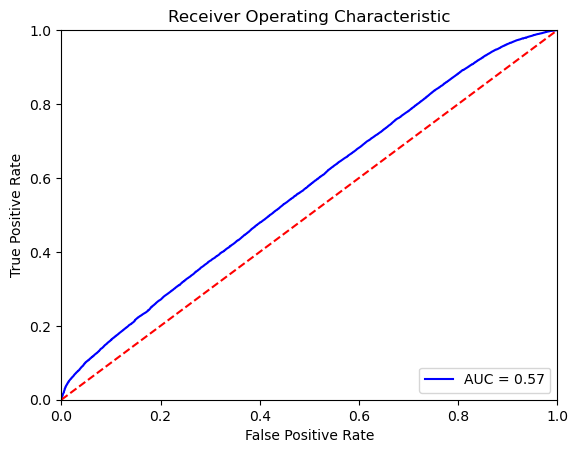

In [28]:
#plot ROC curve for logistic regression model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred = grid.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()